In [14]:
import numpy as np
import pandas as pd

# 设置随机数种子,保证结果可重复
np.random.seed(123)

# 设置学生人数和科目数
n_students = 500
subjects = ["语文", "英语", "政治", "数学", "物理", "化学", "体育"]

# 设置每门科目的平均分和标准差
means = {
    "语文": 72,
    "英语": 75,
    "政治": 78,
    "数学": 80,
    "物理": 70,
    "化学": 73,
    "体育": 85,
}
stds = {
    "语文": 12,
    "英语": 14,
    "政治": 10,
    "数学": 15,
    "物理": 13,
    "化学": 11,
    "体育": 8,
}

# 设置科目之间的相关系数矩阵
corr_matrix = np.array(
    [
        [1.0, 0.7, 0.6, 0.2, 0.1, 0.1, 0.1],  # 语文
        [0.7, 1.0, 0.5, 0.2, 0.1, 0.1, 0.1],  # 英语
        [0.6, 0.5, 1.0, 0.1, 0.1, 0.1, 0.1],  # 政治
        [0.2, 0.2, 0.1, 1.0, 0.7, 0.6, 0.1],  # 数学
        [0.1, 0.1, 0.1, 0.7, 1.0, 0.5, 0.1],  # 物理
        [0.1, 0.1, 0.1, 0.6, 0.5, 1.0, 0.1],  # 化学
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0],  # 体育
    ]
)

# 根据相关系数矩阵生成多元正态分布的随机数
scores = np.random.multivariate_normal(
    mean=[means[s] for s in subjects],
    cov=np.outer(
        np.array([stds[s] for s in subjects]), np.array([stds[s] for s in subjects])
    )
    * corr_matrix,
    size=n_students,
)

# 将成绩四舍五入为整数,并限制在0-100分之间
scores = np.round(scores).astype(int)
scores = np.clip(scores, 0, 500)

# 随机生成5%的缺失值
# missing_mask = np.random.choice([False, True], size=scores.shape, p=[0.95, 0.05])
# scores[missing_mask] = np.nan

# 创建数据框
df = pd.DataFrame(scores, columns=subjects)

# 添加学生ID列
df.insert(0, "学生ID", range(1, n_students + 1))

# 保存数据到CSV文件
df.to_csv("data/student_scores_data_v2.csv", index=False)

print("数据已生成并保存到 'student_scores_data_v2.csv'")

数据已生成并保存到 'student_scores_data_v2.csv'


In [15]:
df.head()

,学生ID,语文,英语,政治,数学,物理,化学,体育
0,1,100,92,71,94,68,74,89
1,2,91,87,84,84,57,74,88
2,3,72,68,89,88,91,59,79
3,4,60,56,51,72,60,59,84
4,5,55,84,59,91,67,83,92


特征值大于1法建议提取 7 个因子


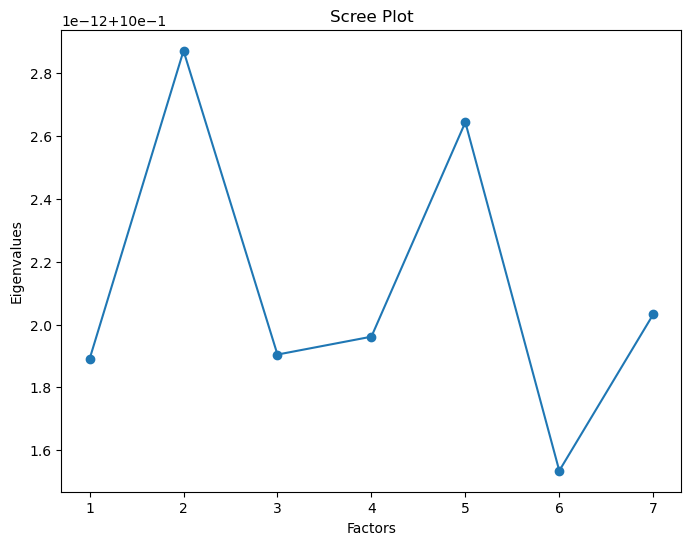

平行分析法建议提取 2 个因子
理论解释法建议提取 2 个因子


In [16]:
from sklearn.decomposition import FactorAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据

X = df.drop("学生ID", axis=1)

# 特征值大于1法
eigen_values, _ = np.linalg.eig(np.cov(X.T))
num_factors_kaiser = sum(eigen_values > 1)
print(f"特征值大于1法建议提取 {num_factors_kaiser} 个因子")

# 碎石图法
fa = FactorAnalysis()
fa.fit(X)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), fa.noise_variance_, marker="o")
plt.xlabel("Factors")
plt.ylabel("Eigenvalues")
plt.title("Scree Plot")
plt.show()

# 平行分析法
num_datasets = 100
percentile = 95
random_eigen_values = []
for _ in range(num_datasets):
    random_data = np.random.normal(0, 1, size=X.shape)
    _, s, _ = np.linalg.svd(random_data)
    random_eigen_values.append(s**2 / X.shape[0])

random_eigen_values = np.percentile(random_eigen_values, percentile, axis=0)
num_factors_pa = sum(fa.noise_variance_ > random_eigen_values)
print(f"平行分析法建议提取 {num_factors_pa} 个因子")

# 理论解释法
num_factors_theory = 2  # 假设根据理论背景,我们预期提取2个因子
print(f"理论解释法建议提取 {num_factors_theory} 个因子")

In [18]:
from sklearn.datasets import load_digits

X, _ = load_digits(return_X_y=True)

In [19]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])